In [ ]:
#Before running the code.
#make sure to have .env file in the same directory and the variable names are the same as what we have been
#using in class

In [391]:
#libraries needed for project
import BTPT
from nltk.corpus import stopwords
import re
import os
from dotenv import load_dotenv
import lyricsgenius as lg
import requests
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
load_dotenv("3510.env")

In [71]:
#genius api info
geniusClient = os.getenv("GENIUS_CLIENT_ID")
geniusSecret = os.getenv("GENIUS_CLIENT_SECRET")
geniusClientAccess = os.getenv("GENIUS_CLIENT_ACCESS_TOKEN")

In [72]:
#initalize genius api object
genius = lg.Genius(geniusClientAccess)

In [73]:
#load in stopwords
with open("stop-word-list.txt") as stopWordsFileHandle:
    stopWordsList = stopWordsFileHandle.read().split()
len(stopWordsList)

319

In [40]:
print(stopWordsList)

['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both', 'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'computer', 'con', 'could', 'couldnt', 'cry', 'de', 'describe', 'detail', 'do', 'done', 'down', 'due', 'during', 'each', 'eg', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fify', 'fill', 'find', 'fire', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', '

In [74]:
allStopWords = stopwords.words("english") + stopWordsList

In [75]:
stopWordsSet = set(allStopWords)
len(stopWordsSet)

383

In [54]:
#function to clean up lyrics
def cleanLyrics(lyrics):
    cleanedLyrics = re.sub("\d+ Contributor.+Lyrics", "", lyrics)
    cleanedLyrics = re.sub("[\!\.\?\'\$\w ]*You might also like\n","", cleanedLyrics)
    cleanedLyrics = re.sub("\d*Embed$","", cleanedLyrics)
    cleanedLyrics = re.sub(r"\[(.*?)\]","", cleanedLyrics)
    if(cleanedLyrics.count("\nYou might also like \n")==1):
        cleanedLyrics = cleanedLyrics.replace("\nYou might also like \n")
    return cleanedLyrics

In [195]:
song = genius.search_song("Doomsday")

Searching for "Doomsday"...
Done.


In [55]:
print(cleanLyrics(song.lyrics))


Mic Check
When I was led to you
I knew you were the one for me
Come through, dig the sound
I swear the whole world could feel you MC
Crowd around

I used to cop a lot, but never copped no drop
Hold mics like pony tails tight and bob a lot
Stop and stick around, come through and dig the sound
Of the fly brown 6-0 sicko psycho who throws his dick around
Bound to go three-plat, came to destroy rap
It's a intricate plot of a b-boy strapped
Femstat cats get kidnapped
Then release a statement to the press, let the rest know who did that
Metal Fist terrorists claim responsibility
Broken household name usually said in hostility
Um... what is MF? You silly
I'd like to take "Mens to the End" for two milli'
"Doo-doo-doo-doo-doo!" That's a audio daily double
Rappers need to fall off just to save me the trouble, yo
Watch your own back came in and go out alone, black
Stay in the zone—turn H2O to Cognac
You might also like
On Doomsday, ever since the womb
‘Til I'm back where my brother went, that's 

In [81]:
cleanedDoomsdayLyrics = cleanLyrics(song.lyrics)

In [82]:
print(cleanedDoomsdayLyrics)


Mic Check
When I was led to you
I knew you were the one for me
Come through, dig the sound
I swear the whole world could feel you MC
Crowd around

I used to cop a lot, but never copped no drop
Hold mics like pony tails tight and bob a lot
Stop and stick around, come through and dig the sound
Of the fly brown 6-0 sicko psycho who throws his dick around
Bound to go three-plat, came to destroy rap
It's a intricate plot of a b-boy strapped
Femstat cats get kidnapped
Then release a statement to the press, let the rest know who did that
Metal Fist terrorists claim responsibility
Broken household name usually said in hostility
Um... what is MF? You silly
I'd like to take "Mens to the End" for two milli'
"Doo-doo-doo-doo-doo!" That's a audio daily double
Rappers need to fall off just to save me the trouble, yo
Watch your own back came in and go out alone, black
Stay in the zone—turn H2O to Cognac
You might also like
On Doomsday, ever since the womb
‘Til I'm back where my brother went, that's 

In [84]:
cleanedDoomsdayLyrics = cleanedDoomsdayLyrics.split(" ")

In [431]:
counter = 0
for word in cleanedDoomsdayLyrics:
    if(word not in stopWordsSet):
        counter+=1 
counter

335

In [120]:
#function to check for unique words in lyrics
def checkForUnique(lyrics):
    lyrics = cleanLyrics(lyrics)
    lyrics = lyrics.split(" ")
    counter = 0
    for word in lyrics:
        if(word not in stopWordsSet):
            counter+=1 
    return counter

In [88]:
#requesting access token
clientID = os.getenv("SPOTIFY_CLIENT_ID")
clientSecret = os.getenv("SPOTIFY_CLIENT_SECRET")
grantType = "client_credentials"
bodyParams = {"grant_type":grantType}
url = "https://accounts.spotify.com/api/token/"
response = requests.post(url, data=bodyParams, auth = (clientID, clientSecret)).json()

In [89]:
headers = {"Authorization":"Bearer "+response["access_token"]} 

rootURL = "https://api.spotify.com/v1/"

In [90]:
doomID = "2pAWfrd7WFF3XhVt9GooDL"

In [91]:
#dictionary of albums to analyze 
albumsDict = {
    'BORN LIKE THIS': '2XfBjZ0ZwKMfwYJDX0JR1O',
    'Madvillainy 2: The Madlib Remix': '2tFoLuLmgTgwFS0P9RVvew',
    'MM...FOOD': '1UcS2nqUhxrZjrBZ3tHk2N',
    'Madvillainy': '19bQiwEKhXUBJWY6oV3KZk',
    'Vaudeville Villain': '7HPjcPD2cr8E5oHvVAmBp7',
    'Operation: Doomsday (Complete)': '5bjUbZPVTEQcb6W3LquX1E',
}

In [103]:
#creating the dictionary of song names to go through and get lyrics from
songsList=[]
for key, value in albumsDict.items():
    albumId = value
    doomAlbumReq = requests.get(rootURL+"albums/"+albumId,headers=headers).json()
    songsPerAlbumList = []
    for song in doomAlbumReq["tracks"]["items"]:
        songsPerAlbumList.append(song["name"])
    songsList.append(songsPerAlbumList)

In [104]:
songsList

[['SUPERVILLAIN (INTRO)',
  'GAZZILLION EAR',
  'BALLSKIN',
  'YESSIR!',
  'ABSOLUTELY',
  'RAP AMBUSH',
  'LIGHTWORKS',
  'BATTY BOYZ',
  'ANGELZ',
  'CELLZ',
  'STILL DOPE',
  'MICROWAVE MAYO',
  'MORE RHYMIN',
  "THAT'S THAT",
  'SUPERVILLAINZ',
  "BUMPY'S MESSAGE",
  'THANK YA',
  'THE.GREEN.WHORE.NET',
  'GAZZILLION EAR - JNEIRO JAREL / DAVE SITEK REMIX',
  'GAZZILLION EAR - DR WHO DAT? REMIX',
  'GAZZILLION EAR - THOM YORKE REMIX'],
 ['Pow! (Intro)',
  'No Brain',
  'Pearls',
  'Light of the Past',
  'Boulder Holder',
  'Borrowed Time',
  "Space Ho's Coast to Coast",
  'Invazion (Interlude)',
  'Drainos',
  'Fire In The Hole',
  'Heat Niner',
  'Monkey Suit',
  'Fluid (Instrumental)',
  "Can't Reform Em",
  'Redd Spot (Interlude)',
  'Running Around with Another',
  'Butter King Jewels',
  'Sermon',
  'Roller Coaster Riders (Instrumental)',
  '3.214',
  'Confucius Spot (Interlude)',
  'Never Go Pop',
  'Savage Beast (Instrumental)',
  'Cold One',
  'Cold One (Reprise)'],
 ['Beef 

In [107]:
#get rid of instrumental songs from albums
for album in songsList:
    for song in album:
        if("Instrumental" in song):
            album.remove(song)
songsList

[['SUPERVILLAIN (INTRO)',
  'GAZZILLION EAR',
  'BALLSKIN',
  'YESSIR!',
  'ABSOLUTELY',
  'RAP AMBUSH',
  'LIGHTWORKS',
  'BATTY BOYZ',
  'ANGELZ',
  'CELLZ',
  'STILL DOPE',
  'MICROWAVE MAYO',
  'MORE RHYMIN',
  "THAT'S THAT",
  'SUPERVILLAINZ',
  "BUMPY'S MESSAGE",
  'THANK YA',
  'THE.GREEN.WHORE.NET',
  'GAZZILLION EAR - JNEIRO JAREL / DAVE SITEK REMIX',
  'GAZZILLION EAR - DR WHO DAT? REMIX',
  'GAZZILLION EAR - THOM YORKE REMIX'],
 ['Pow! (Intro)',
  'No Brain',
  'Pearls',
  'Light of the Past',
  'Boulder Holder',
  'Borrowed Time',
  "Space Ho's Coast to Coast",
  'Invazion (Interlude)',
  'Drainos',
  'Fire In The Hole',
  'Heat Niner',
  'Monkey Suit',
  "Can't Reform Em",
  'Redd Spot (Interlude)',
  'Running Around with Another',
  'Butter King Jewels',
  'Sermon',
  '3.214',
  'Confucius Spot (Interlude)',
  'Never Go Pop',
  'Cold One',
  'Cold One (Reprise)'],
 ['Beef Rap',
  'Hoe Cakes',
  'Potholderz feat. Count Bass D',
  'One Beer',
  'Deep Fried Frenz',
  'Poo-Pu

In [207]:
#list of artists names to make sure correct song is used
artistNames = ["MF DOOM","Viktor Vaughn","Madvillain"]

In [121]:
#dictionary for each album to populate with songs and data
bornLikeThisDict = {
    "Songs": [],
    "Album" : [],
    "Unique Words": [],
    "Release Date": []    
}

In [122]:
#iterate through song list and get lyrics, add data to dictionary
for song in songsList[0]:
    #make request for lyrics
    song1 = genius.search_song(song)
    bornLikeThisDict["Songs"].append(song)
    bornLikeThisDict["Album"].append("Born Like This")
    #find number of unique words in song
    uniqueWords = checkForUnique(song1.lyrics)
    bornLikeThisDict["Unique Words"].append(uniqueWords)
    bornLikeThisDict["Release Date"].append("2009")
    time.sleep(2)

Searching for "SUPERVILLAIN (INTRO)"...
Done.
Searching for "GAZZILLION EAR"...
Done.
Searching for "BALLSKIN"...
Done.
Searching for "YESSIR!"...
Done.
Searching for "ABSOLUTELY"...
Done.
Searching for "RAP AMBUSH"...
Done.
Searching for "LIGHTWORKS"...
Done.
Searching for "BATTY BOYZ"...
Done.
Searching for "ANGELZ"...
Done.
Searching for "CELLZ"...
Done.
Searching for "STILL DOPE"...
Done.
Searching for "MICROWAVE MAYO"...
Done.
Searching for "MORE RHYMIN"...
Done.
Searching for "THAT'S THAT"...
Done.
Searching for "SUPERVILLAINZ"...
Done.
Searching for "BUMPY'S MESSAGE"...
Done.
Searching for "THANK YA"...
Done.
Searching for "THE.GREEN.WHORE.NET"...
Done.
Searching for "GAZZILLION EAR - JNEIRO JAREL / DAVE SITEK REMIX"...
Done.
Searching for "GAZZILLION EAR - DR WHO DAT? REMIX"...
Done.
Searching for "GAZZILLION EAR - THOM YORKE REMIX"...
Done.


In [123]:
bornLikeThisDict

{'Songs': ['SUPERVILLAIN (INTRO)',
  'GAZZILLION EAR',
  'BALLSKIN',
  'YESSIR!',
  'ABSOLUTELY',
  'RAP AMBUSH',
  'LIGHTWORKS',
  'BATTY BOYZ',
  'ANGELZ',
  'CELLZ',
  'STILL DOPE',
  'MICROWAVE MAYO',
  'MORE RHYMIN',
  "THAT'S THAT",
  'SUPERVILLAINZ',
  "BUMPY'S MESSAGE",
  'THANK YA',
  'THE.GREEN.WHORE.NET',
  'GAZZILLION EAR - JNEIRO JAREL / DAVE SITEK REMIX',
  'GAZZILLION EAR - DR WHO DAT? REMIX',
  'GAZZILLION EAR - THOM YORKE REMIX'],
 'Album': ['Born Like This',
  'Born Like This',
  'Born Like This',
  'Born Like This',
  'Born Like This',
  'Born Like This',
  'Born Like This',
  'Born Like This',
  'Born Like This',
  'Born Like This',
  'Born Like This',
  'Born Like This',
  'Born Like This',
  'Born Like This',
  'Born Like This',
  'Born Like This',
  'Born Like This',
  'Born Like This',
  'Born Like This',
  'Born Like This',
  'Born Like This'],
 'Unique Words': [34,
  422,
  138,
  259,
  226,
  142,
  130,
  292,
  306,
  312,
  289,
  200,
  157,
  217,
  255

In [115]:
for song in songsList[0]:
    print(song)

SUPERVILLAIN (INTRO)
GAZZILLION EAR
BALLSKIN
YESSIR!
ABSOLUTELY
RAP AMBUSH
LIGHTWORKS
BATTY BOYZ
ANGELZ
CELLZ
STILL DOPE
MICROWAVE MAYO
MORE RHYMIN
THAT'S THAT
SUPERVILLAINZ
BUMPY'S MESSAGE
THANK YA
THE.GREEN.WHORE.NET
GAZZILLION EAR - JNEIRO JAREL / DAVE SITEK REMIX
GAZZILLION EAR - DR WHO DAT? REMIX
GAZZILLION EAR - THOM YORKE REMIX


In [129]:
bornLikeThisDf = pd.DataFrame(bornLikeThisDict)
bornLikeThisDf

,Songs,Album,Unique Words,Release Date
0,SUPERVILLAIN (INTRO),Born Like This,34,2009
1,GAZZILLION EAR,Born Like This,422,2009
2,BALLSKIN,Born Like This,138,2009
3,YESSIR!,Born Like This,259,2009
4,ABSOLUTELY,Born Like This,226,2009
5,RAP AMBUSH,Born Like This,142,2009
6,LIGHTWORKS,Born Like This,130,2009
7,BATTY BOYZ,Born Like This,292,2009
8,ANGELZ,Born Like This,306,2009
9,CELLZ,Born Like This,312,2009


In [126]:
madvillany2Dict = {
    "Songs": [],
    "Album" : [],
    "Unique Words": [],
    "Release Date": []    
}

In [128]:
for song in songsList[1]:
    song1 = genius.search_song(song)
    madvillany2Dict["Songs"].append(song)
    madvillany2Dict["Album"].append("Madvillainy 2")
    uniqueWords = checkForUnique(song1.lyrics)
    madvillany2Dict["Unique Words"].append(uniqueWords)
    madvillany2Dict["Release Date"].append("2008")
    time.sleep(2)

Searching for "Pow! (Intro)"...
Done.
Searching for "No Brain"...
Done.
Searching for "Pearls"...
Done.
Searching for "Light of the Past"...
Done.
Searching for "Boulder Holder"...
Done.
Searching for "Borrowed Time"...
Done.
Searching for "Space Ho's Coast to Coast"...
Done.
Searching for "Invazion (Interlude)"...
Done.
Searching for "Drainos"...
Done.
Searching for "Fire In The Hole"...
Done.
Searching for "Heat Niner"...
Done.
Searching for "Monkey Suit"...
Done.
Searching for "Can't Reform Em"...
Done.
Searching for "Redd Spot (Interlude)"...
Done.
Searching for "Running Around with Another"...
Done.
Searching for "Butter King Jewels"...
Done.
Searching for "Sermon"...
Done.
Searching for "3.214"...
Done.
Searching for "Confucius Spot (Interlude)"...
Done.
Searching for "Never Go Pop"...
Done.
Searching for "Cold One"...
Done.
Searching for "Cold One (Reprise)"...
Done.


In [131]:
madvillany2Dict

{'Songs': ['Pow! (Intro)',
  'No Brain',
  'Pearls',
  'Light of the Past',
  'Boulder Holder',
  'Borrowed Time',
  "Space Ho's Coast to Coast",
  'Invazion (Interlude)',
  'Drainos',
  'Fire In The Hole',
  'Heat Niner',
  'Monkey Suit',
  "Can't Reform Em",
  'Redd Spot (Interlude)',
  'Running Around with Another',
  'Butter King Jewels',
  'Sermon',
  '3.214',
  'Confucius Spot (Interlude)',
  'Never Go Pop',
  'Cold One',
  'Cold One (Reprise)'],
 'Album': ['Madvillainy 2',
  'Madvillainy 2',
  'Madvillainy 2',
  'Madvillainy 2',
  'Madvillainy 2',
  'Madvillainy 2',
  'Madvillainy 2',
  'Madvillainy 2',
  'Madvillainy 2',
  'Madvillainy 2',
  'Madvillainy 2',
  'Madvillainy 2',
  'Madvillainy 2',
  'Madvillainy 2',
  'Madvillainy 2',
  'Madvillainy 2',
  'Madvillainy 2',
  'Madvillainy 2',
  'Madvillainy 2',
  'Madvillainy 2',
  'Madvillainy 2',
  'Madvillainy 2'],
 'Unique Words': [174,
  275,
  178,
  150,
  183,
  73,
  344,
  40,
  148,
  140,
  155,
  428,
  140,
  41,
  16

In [132]:
madvillany2Df = pd.DataFrame(madvillany2Dict)
madvillany2Df

,Songs,Album,Unique Words,Release Date
0,Pow! (Intro),Madvillainy 2,174,2008
1,No Brain,Madvillainy 2,275,2008
2,Pearls,Madvillainy 2,178,2008
3,Light of the Past,Madvillainy 2,150,2008
4,Boulder Holder,Madvillainy 2,183,2008
5,Borrowed Time,Madvillainy 2,73,2008
6,Space Ho's Coast to Coast,Madvillainy 2,344,2008
7,Invazion (Interlude),Madvillainy 2,40,2008
8,Drainos,Madvillainy 2,148,2008
9,Fire In The Hole,Madvillainy 2,140,2008


In [133]:
mmFoodDict = {
    "Songs": [],
    "Album" : [],
    "Unique Words": [],
    "Release Date": []    
}

In [134]:
for song in songsList[2]:
    song1 = genius.search_song(song)
    mmFoodDict["Songs"].append(song)
    mmFoodDict["Album"].append("MM...FOOD")
    uniqueWords = checkForUnique(song1.lyrics)
    mmFoodDict["Unique Words"].append(uniqueWords)
    mmFoodDict["Release Date"].append("2004")
    time.sleep(2)

Searching for "Beef Rap"...
Done.
Searching for "Hoe Cakes"...
Done.
Searching for "Potholderz feat. Count Bass D"...
Done.
Searching for "One Beer"...
Done.
Searching for "Deep Fried Frenz"...
Done.
Searching for "Poo-Putt Platter"...
Done.
Searching for "Fillet-O-Rapper"...
Done.
Searching for "Gumbo"...
Done.
Searching for "Fig Leaf Bi-Carbonate"...
Done.
Searching for "Kon Karne"...
Done.
Searching for "Guinnesses feat. Angelika & 4ize"...
Done.
Searching for "Kon Queso"...
Done.
Searching for "Rapp Snitch Knishes feat. Mr. Fantastik"...
Done.
Searching for "Vomitspit"...
Done.
Searching for "Kookies"...
Done.


In [135]:
mmFoodDict

{'Songs': ['Beef Rap',
  'Hoe Cakes',
  'Potholderz feat. Count Bass D',
  'One Beer',
  'Deep Fried Frenz',
  'Poo-Putt Platter',
  'Fillet-O-Rapper',
  'Gumbo',
  'Fig Leaf Bi-Carbonate',
  'Kon Karne',
  'Guinnesses feat. Angelika & 4ize',
  'Kon Queso',
  'Rapp Snitch Knishes feat. Mr. Fantastik',
  'Vomitspit',
  'Kookies'],
 'Album': ['MM...FOOD',
  'MM...FOOD',
  'MM...FOOD',
  'MM...FOOD',
  'MM...FOOD',
  'MM...FOOD',
  'MM...FOOD',
  'MM...FOOD',
  'MM...FOOD',
  'MM...FOOD',
  'MM...FOOD',
  'MM...FOOD',
  'MM...FOOD',
  'MM...FOOD',
  'MM...FOOD'],
 'Unique Words': [402,
  369,
  63,
  342,
  404,
  65,
  62,
  300,
  159,
  235,
  343,
  379,
  63,
  200,
  333],
 'Release Date': ['2004',
  '2004',
  '2004',
  '2004',
  '2004',
  '2004',
  '2004',
  '2004',
  '2004',
  '2004',
  '2004',
  '2004',
  '2004',
  '2004',
  '2004']}

In [136]:
mmFoodDf = pd.DataFrame(mmFoodDict)
mmFoodDf

,Songs,Album,Unique Words,Release Date
0,Beef Rap,MM...FOOD,402,2004
1,Hoe Cakes,MM...FOOD,369,2004
2,Potholderz feat. Count Bass D,MM...FOOD,63,2004
3,One Beer,MM...FOOD,342,2004
4,Deep Fried Frenz,MM...FOOD,404,2004
5,Poo-Putt Platter,MM...FOOD,65,2004
6,Fillet-O-Rapper,MM...FOOD,62,2004
7,Gumbo,MM...FOOD,300,2004
8,Fig Leaf Bi-Carbonate,MM...FOOD,159,2004
9,Kon Karne,MM...FOOD,235,2004


In [144]:
madvillanyDict = {
    "Songs": [],
    "Album" : [],
    "Unique Words": [],
    "Release Date": []    
}

In [145]:
for song in songsList[3]:
    song1 = genius.search_song(song)
    if(song1 is not None):
        madvillanyDict["Songs"].append(song)
        madvillanyDict["Album"].append("Madvillainy")
        uniqueWords = checkForUnique(song1.lyrics)
        madvillanyDict["Unique Words"].append(uniqueWords)
        madvillanyDict["Release Date"].append("2004")
        time.sleep(2)

Searching for "The Illest Villains"...
Done.
Searching for "Accordion"...
Done.
Searching for "Meat Grinder"...
Done.
Searching for "Bistro"...
Done.
Searching for "Raid"...
Done.
Searching for "America's Most Blunted"...
Done.
Searching for "Sickfit"...
Specified song does not contain lyrics. Rejecting.
Searching for "Rainbows"...
Done.
Searching for "Curls"...
Done.
Searching for "Do Not Fire!"...
Specified song does not contain lyrics. Rejecting.
Searching for "Money Folder"...
Done.
Searching for "Shadows of Tomorrow"...
Done.
Searching for "Operation Lifesaver aka Mint Test"...
Done.
Searching for "Figaro"...
Done.
Searching for "Hardcore Hustle"...
Done.
Searching for "Strange Ways"...
Done.
Searching for "Fancy Clown"...
Done.
Searching for "Eye"...
Done.
Searching for "Supervillain Theme"...
Done.
Searching for "All Caps"...
Done.
Searching for "Great Day"...
Done.
Searching for "Rhinestone Cowboy"...
Done.


In [146]:
madvillanyDf = pd.DataFrame(madvillanyDict)
madvillanyDf

,Songs,Album,Unique Words,Release Date
0,The Illest Villains,Madvillainy,109,2004
1,Accordion,Madvillainy,141,2004
2,Meat Grinder,Madvillainy,163,2004
3,Bistro,Madvillainy,58,2004
4,Raid,Madvillainy,179,2004
5,America's Most Blunted,Madvillainy,354,2004
6,Rainbows,Madvillainy,112,2004
7,Curls,Madvillainy,112,2004
8,Money Folder,Madvillainy,229,2004
9,Shadows of Tomorrow,Madvillainy,169,2004


In [197]:
doomsday = genius.search_song("Doomsday")

Searching for "Doomsday"...
Done.


In [198]:
mfDoom = doomsday.artist
mfDoom

'MF DOOM'

In [211]:
vaudevilleDict = {
    "Songs": [],
    "Album" : [],
    "Unique Words": [],
    "Release Date": []    
}

In [212]:
for song in songsList[4]:
    song1 = genius.search_song(song)
    if(song1 is not None):
         if(song1.artist in artistNames):
            vaudevilleDict["Songs"].append(song)
            vaudevilleDict["Album"].append("Vaudeville Villain")
            uniqueWords = checkForUnique(song1.lyrics)
            vaudevilleDict["Unique Words"].append(uniqueWords)
            vaudevilleDict["Release Date"].append("2003")
            time.sleep(2)

Searching for "Overture"...
Done.
Searching for "Vaudeville Villain"...
Done.
Searching for "Lickupon"...
Done.
Searching for "The Drop"...
Done.
Searching for "Lactose and Lecithin"...
Done.
Searching for "A Dead Mouse"...
Done.
Searching for "Open Mic Nite, Pt. 1 (feat. Lord Sear, Benn Grimm as Brother Sambuca, Rodan as Dr. Moraue, & Louis Logic as Himself)"...
No results found for: 'Open Mic Nite, Pt. 1 (feat. Lord Sear, Benn Grimm as Brother Sambuca, Rodan as Dr. Moraue, & Louis Logic as Himself)'
Searching for "Raedawn"...
Done.
Searching for "Can I Watch? (feat. Apani B as Nikki)"...
Done.
Searching for "Saliva"...
Done.
Searching for "A Modern Day Mugging"...
Done.
Searching for "Open Mic Nite, Pt. 2 (feat. Lord Sear & Hydro)"...
No results found for: 'Open Mic Nite, Pt. 2 (feat. Lord Sear & Hydro)'
Searching for "Never Dead (feat. M. Sayyid as Curis Strifer)"...
Done.
Searching for "Popsnot"...
Done.
Searching for "Mr. Clean"...
Done.
Searching for "G.M.C."...
Done.
Searching f

In [213]:
vaudevilleDf = pd.DataFrame(vaudevilleDict)
vaudevilleDf

,Songs,Album,Unique Words,Release Date
0,Vaudeville Villain,Vaudeville Villain,208,2003
1,Lickupon,Vaudeville Villain,229,2003
2,The Drop,Vaudeville Villain,356,2003
3,Lactose and Lecithin,Vaudeville Villain,264,2003
4,A Dead Mouse,Vaudeville Villain,213,2003
5,Raedawn,Vaudeville Villain,238,2003
6,Saliva,Vaudeville Villain,236,2003
7,Popsnot,Vaudeville Villain,201,2003
8,G.M.C.,Vaudeville Villain,264,2003


In [187]:
test = genius.search_song("Never Dead (feat. M. Sayyid as Curis Strifer)","MF DOOM")
test.artist

Searching for "Never Dead (feat. M. Sayyid as Curis Strifer)" by MF DOOM...
No results found for: 'Never Dead (feat. M. Sayyid as Curis Strifer) MF DOOM'


AttributeError: 'NoneType' object has no attribute 'artist'

In [165]:
opDoomDict = {
    "Songs": [],
    "Album" : [],
    "Unique Words": [],
    "Release Date": []    
}

In [166]:
for song in songsList[5]:
    song1 = genius.search_song(song)
    if(song1 is not None):
        opDoomDict["Songs"].append(song)
        opDoomDict["Album"].append("Operation: Doomsday")
        uniqueWords = checkForUnique(song1.lyrics)
        opDoomDict["Unique Words"].append(uniqueWords)
        opDoomDict["Release Date"].append("1999")
        time.sleep(2)

Searching for "Doomsday"...
Done.
Searching for "Rhymes Like Dimes"...
Done.
Searching for "The Finest"...
Done.
Searching for "Go With the Flow"...
Done.
Searching for "Tick, Tick..."...
Done.
Searching for "Red and Gold"...
Done.
Searching for "The Hands of Doom (Skit)"...
Done.
Searching for "Who You Think I Am?"...
Done.
Searching for "Doom, Are You Awake? (Skit)"...
Done.
Searching for "Hey!"...
Done.
Searching for "Operation: Greenbacks"...
Done.
Searching for "The Mic"...
Done.
Searching for "The Mystery of Doom (Skit)"...
Specified song does not contain lyrics. Rejecting.
Searching for "Dead Bent"...
Done.
Searching for "Gas Drawls"...
Done.
Searching for "?"...
Done.
Searching for "Hero v.s. Villain (Epilogue)"...
Done.
Searching for "Dead Bent - 12" Version"...
Done.
Searching for "Gas Drawls - 12" Version"...
Done.
Searching for "Hey - 12" Version"...
Done.
Searching for "Greenbacks - 12" Version"...
Done.
Searching for "Go With the Flow - 12" Version"...
Done.


KeyboardInterrupt: 

In [167]:
opDoomDict

{'Songs': ['Doomsday',
  'Rhymes Like Dimes',
  'The Finest',
  'Go With the Flow',
  'Tick, Tick...',
  'Red and Gold',
  'The Hands of Doom (Skit)',
  'Who You Think I Am?',
  'Doom, Are You Awake? (Skit)',
  'Hey!',
  'Operation: Greenbacks',
  'The Mic',
  'Dead Bent',
  'Gas Drawls',
  '?',
  'Hero v.s. Villain (Epilogue)',
  'Dead Bent - 12" Version',
  'Gas Drawls - 12" Version',
  'Hey - 12" Version',
  'Greenbacks - 12" Version',
  'Go With the Flow - 12" Version'],
 'Album': ['Operation: Doomsday',
  'Operation: Doomsday',
  'Operation: Doomsday',
  'Operation: Doomsday',
  'Operation: Doomsday',
  'Operation: Doomsday',
  'Operation: Doomsday',
  'Operation: Doomsday',
  'Operation: Doomsday',
  'Operation: Doomsday',
  'Operation: Doomsday',
  'Operation: Doomsday',
  'Operation: Doomsday',
  'Operation: Doomsday',
  'Operation: Doomsday',
  'Operation: Doomsday',
  'Operation: Doomsday',
  'Operation: Doomsday',
  'Operation: Doomsday',
  'Operation: Doomsday',
  'Operatio

In [168]:
opDoomDf = pd.DataFrame(opDoomDict)
opDoomDf

,Songs,Album,Unique Words,Release Date
0,Doomsday,Operation: Doomsday,335,1999
1,Rhymes Like Dimes,Operation: Doomsday,380,1999
2,The Finest,Operation: Doomsday,431,1999
3,Go With the Flow,Operation: Doomsday,76,1999
4,"Tick, Tick...",Operation: Doomsday,289,1999
5,Red and Gold,Operation: Doomsday,284,1999
6,The Hands of Doom (Skit),Operation: Doomsday,72,1999
7,Who You Think I Am?,Operation: Doomsday,392,1999
8,"Doom, Are You Awake? (Skit)",Operation: Doomsday,64,1999
9,Hey!,Operation: Doomsday,770,1999


In [169]:
bornLikeThisDf

,Songs,Album,Unique Words,Release Date
0,SUPERVILLAIN (INTRO),Born Like This,34,2009
1,GAZZILLION EAR,Born Like This,422,2009
2,BALLSKIN,Born Like This,138,2009
3,YESSIR!,Born Like This,259,2009
4,ABSOLUTELY,Born Like This,226,2009
5,RAP AMBUSH,Born Like This,142,2009
6,LIGHTWORKS,Born Like This,130,2009
7,BATTY BOYZ,Born Like This,292,2009
8,ANGELZ,Born Like This,306,2009
9,CELLZ,Born Like This,312,2009


<function matplotlib.pyplot.show(close=None, block=None)>

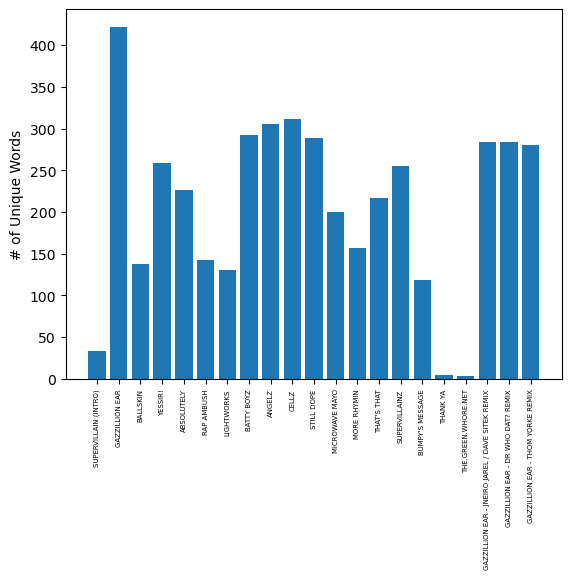

In [175]:
plt.bar(bornLikeThisDf["Songs"],bornLikeThisDf["Unique Words"])
plt.ylabel("# of Unique Words")
plt.xticks(rotation=90, fontsize=5) 
plt.show

In [257]:
#put all dataframes into a list
dataframesList = [bornLikeThisDf,madvillany2Df,mmFoodDf,madvillanyDf,vaudevilleDf,opDoomDf]

In [258]:
#combine all albums dfs into one large dataframe
albumsDf = pd.concat(dataframesList, ignore_index=True)

In [262]:
#checking for outliers
albumsDf[albumsDf["Unique Words"]>700]

,Songs,Album,Unique Words,Release Date


In [260]:
#removing outlier
albumsDf = albumsDf.drop(96)

In [261]:
albumsDf

,Songs,Album,Unique Words,Release Date
0,SUPERVILLAIN (INTRO),Born Like This,34,2009
1,GAZZILLION EAR,Born Like This,422,2009
2,BALLSKIN,Born Like This,138,2009
3,YESSIR!,Born Like This,259,2009
4,ABSOLUTELY,Born Like This,226,2009
...,...,...,...,...
103,"Dead Bent - 12"" Version",Operation: Doomsday,257,1999
104,"Gas Drawls - 12"" Version",Operation: Doomsday,285,1999
105,"Hey - 12"" Version",Operation: Doomsday,320,1999
106,"Greenbacks - 12"" Version",Operation: Doomsday,297,1999


In [438]:
#stats for unique words
albumsDf["Unique Words"].describe()

count    107.000000
mean     212.214953
std      108.507197
min        2.000000
25%      140.000000
50%      216.000000
75%      289.000000
max      431.000000
Name: Unique Words, dtype: float64

/var/folders/lt/v7f4g3910flfhby34v4b7n7w0000gn/T/ipykernel_45515/648165138.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(albumsDf['Songs'], rotation=90, ha="right", fontsize=20)


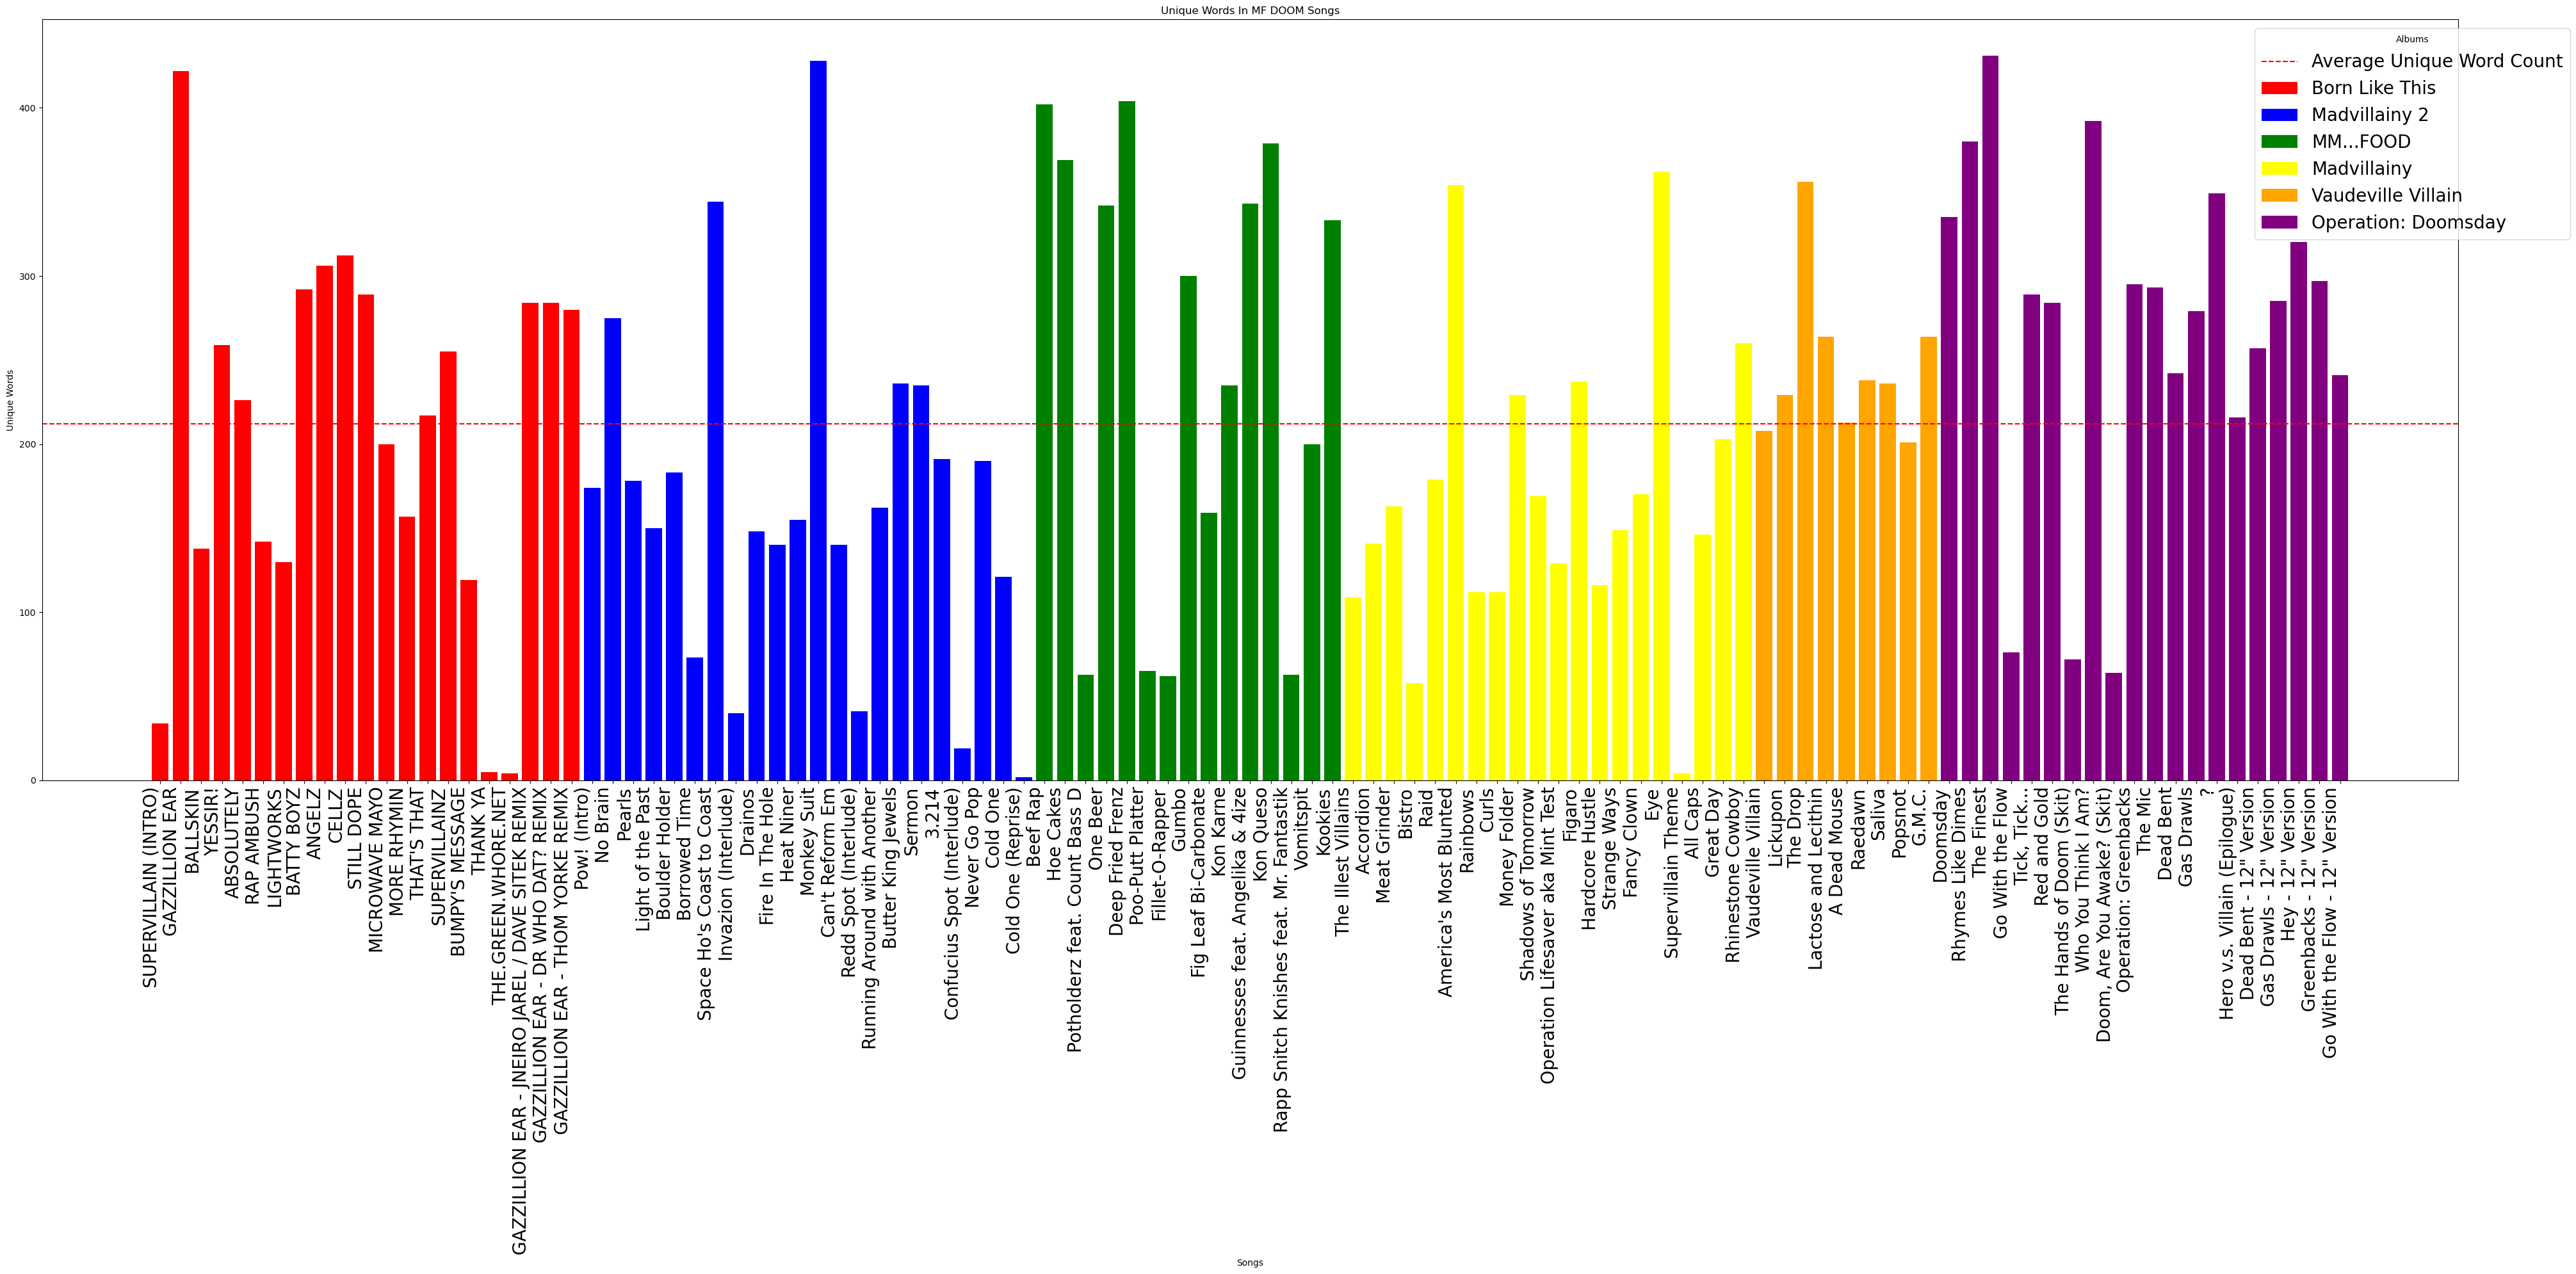

<Figure size 640x480 with 0 Axes>

In [439]:
#visualization that shows unique words across different albums
unique_albums = albumsDf['Album'].unique()
colors = ["red","blue","green","yellow","orange","purple"]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(40,20))

# Loop through albums and plot bars with different colors
for album, color in zip(unique_albums, colors):
    album_data = albumsDf[albumsDf['Album'] == album]
    ax.bar(album_data['Songs'], album_data['Unique Words'], label=album, color=color)
    
average = albumsDf['Unique Words'].mean()
ax.axhline(average, color='red', linestyle='--', label='Average Unique Word Count')


# Set x-axis labels and rotate them for readability
ax.set_xticklabels(albumsDf['Songs'], rotation=90, ha="right", fontsize=20)
# Add a legend
ax.legend(title="Albums", fontsize=20, bbox_to_anchor=(1.05, 1))

# Add labels and title
ax.set_xlabel('Songs')
ax.set_ylabel('Unique Words')
ax.set_title('Unique Words In MF DOOM Songs')

# Display the graph
plt.tight_layout()
plt.show()
plt.savefig('uniquewordsplot.png', format='png')


In [280]:
albumsDf.to_csv("Unique Words.csv")

In [348]:
#created different strings to see most common words
bornLikeThisLyrics = ""

In [349]:
#grabbed all lyrics from each album
for song in songsList[0]:
    song1 = genius.search_song(song)
    if(song1 is not None):
         if(song1.artist in artistNames):
                bornLikeThisLyrics += song1.lyrics

Searching for "SUPERVILLAIN (INTRO)"...
Done.
Searching for "GAZZILLION EAR"...
Done.
Searching for "BALLSKIN"...
Done.
Searching for "YESSIR!"...
Done.
Searching for "ABSOLUTELY"...
Done.
Searching for "RAP AMBUSH"...
Done.
Searching for "LIGHTWORKS"...
Done.
Searching for "BATTY BOYZ"...
Done.
Searching for "ANGELZ"...
Done.
Searching for "CELLZ"...
Done.
Searching for "STILL DOPE"...
Done.
Searching for "MICROWAVE MAYO"...
Done.
Searching for "MORE RHYMIN"...
Done.
Searching for "THAT'S THAT"...
Done.
Searching for "SUPERVILLAINZ"...
Done.
Searching for "BUMPY'S MESSAGE"...
Done.
Searching for "THANK YA"...
Done.
Searching for "THE.GREEN.WHORE.NET"...
Done.
Searching for "GAZZILLION EAR - JNEIRO JAREL / DAVE SITEK REMIX"...
Done.
Searching for "GAZZILLION EAR - DR WHO DAT? REMIX"...
Done.
Searching for "GAZZILLION EAR - THOM YORKE REMIX"...
Done.


In [404]:
#tokenize words in album
from nltk.tokenize import regexp_tokenize
import string
allWords = regexp_tokenize(bornLikeThisLyrics,"[\w']+")
#remove short words
for word in allWords:
    if(len(word) < 4):
        allWords.remove(word)
#find frequency of each word
allWordDist = nltk.FreqDist(w.lower() for w in allWords)
#remove stop words
stopwords = nltk.corpus.stopwords.words('english')
allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords)    

In [405]:
#most common words in album
bornLikeThisMostCommon = allWordExceptStopDist.most_common(10)

In [406]:
bornLikeThisMostCommon

[('like', 96),
 ('villain', 37),
 ('doom', 32),
 ('verse', 27),
 ('know', 25),
 ('might', 22),
 ('lyrics', 22),
 ("it's", 21),
 ('also', 20),
 ('get', 20)]

In [320]:
madvillainy2lyrics = ""

In [322]:
for song in songsList[1]:
    song1 = genius.search_song(song)
    if(song1 is not None):
         if(song1.artist in artistNames):
                madvillainy2lyrics += song1.lyrics

Searching for "Pow! (Intro)"...
Done.
Searching for "No Brain"...
Done.
Searching for "Pearls"...
Done.
Searching for "Light of the Past"...
Done.
Searching for "Boulder Holder"...
Done.
Searching for "Borrowed Time"...
Done.
Searching for "Space Ho's Coast to Coast"...
Done.
Searching for "Invazion (Interlude)"...
Done.
Searching for "Drainos"...
Done.
Searching for "Fire In The Hole"...
Done.
Searching for "Heat Niner"...
Done.
Searching for "Monkey Suit"...
Done.
Searching for "Can't Reform Em"...
Done.
Searching for "Redd Spot (Interlude)"...
Done.
Searching for "Running Around with Another"...
Done.
Searching for "Butter King Jewels"...
Done.
Searching for "Sermon"...
Done.
Searching for "3.214"...
Done.
Searching for "Confucius Spot (Interlude)"...
Done.
Searching for "Never Go Pop"...
Done.
Searching for "Cold One"...
Done.
Searching for "Cold One (Reprise)"...
Done.


In [407]:
from nltk.tokenize import regexp_tokenize
import string
allWords = regexp_tokenize(madvillainy2lyrics,"[\w']+")
for word in allWords:
    if(len(word) < 4):
        allWords.remove(word)
allWordDist = nltk.FreqDist(w.lower() for w in allWords)

stopwords = nltk.corpus.stopwords.words('english')
allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords)  

In [408]:
madvillainy2MostCommon = allWordExceptStopDist.most_common(10)

In [409]:
madvillainy2MostCommon

[('like', 54),
 ('know', 20),
 ('doom', 19),
 ('right', 19),
 ('past', 18),
 ('verse', 18),
 ('might', 17),
 ('also', 16),
 ('get', 16),
 ('back', 15)]

In [328]:
mmFoodLyrics = ""

In [329]:
for song in songsList[2]:
    song1 = genius.search_song(song)
    if(song1 is not None):
         if(song1.artist in artistNames):
                mmFoodLyrics += song1.lyrics

Searching for "Beef Rap"...
Done.
Searching for "Hoe Cakes"...
Done.
Searching for "Potholderz feat. Count Bass D"...
Done.
Searching for "One Beer"...
Done.
Searching for "Deep Fried Frenz"...
Done.
Searching for "Poo-Putt Platter"...
Done.
Searching for "Fillet-O-Rapper"...
Done.
Searching for "Gumbo"...
Done.
Searching for "Fig Leaf Bi-Carbonate"...
Done.
Searching for "Kon Karne"...
Done.
Searching for "Guinnesses feat. Angelika & 4ize"...
Done.
Searching for "Kon Queso"...
Done.
Searching for "Rapp Snitch Knishes feat. Mr. Fantastik"...
Done.
Searching for "Vomitspit"...
Done.
Searching for "Kookies"...
Done.


In [410]:
from nltk.tokenize import regexp_tokenize
import string
allWords = regexp_tokenize(mmFoodLyrics,"[\w']+")
for word in allWords:
    if(len(word) < 4):
        allWords.remove(word)
allWordDist = nltk.FreqDist(w.lower() for w in allWords)

stopwords = nltk.corpus.stopwords.words('english')
allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords) 

In [411]:
mmFoodMostCommon = allWordExceptStopDist.most_common(10)

In [412]:
mmFoodMostCommon

[('like', 81),
 ('doom', 41),
 ('i', 31),
 ('get', 23),
 ('know', 22),
 ('take', 20),
 ('back', 17),
 ('food', 17),
 ('never', 17),
 ('voice', 17)]

In [343]:
madvillainyLyrics = ""

In [345]:
for song in songsList[3]:
    song1 = genius.search_song(song)
    if(song1 is not None):
         if(song1.artist in artistNames):
                madvillainyLyrics += song1.lyrics

Searching for "The Illest Villains"...
Done.
Searching for "Accordion"...
Done.
Searching for "Meat Grinder"...
Done.
Searching for "Bistro"...
Done.
Searching for "Raid"...
Done.
Searching for "America's Most Blunted"...
Done.
Searching for "Sickfit"...
Specified song does not contain lyrics. Rejecting.
Searching for "Rainbows"...
Done.
Searching for "Curls"...
Done.
Searching for "Do Not Fire!"...
Specified song does not contain lyrics. Rejecting.
Searching for "Money Folder"...
Done.
Searching for "Shadows of Tomorrow"...
Done.
Searching for "Operation Lifesaver aka Mint Test"...
Done.
Searching for "Figaro"...
Done.
Searching for "Hardcore Hustle"...
Done.
Searching for "Strange Ways"...
Done.
Searching for "Fancy Clown"...
Done.
Searching for "Eye"...
Done.
Searching for "Supervillain Theme"...
Done.
Searching for "All Caps"...
Done.
Searching for "Great Day"...
Done.
Searching for "Rhinestone Cowboy"...
Done.


In [413]:
from nltk.tokenize import regexp_tokenize
import string
allWords = regexp_tokenize(madvillainyLyrics,"[\w']+")
for word in allWords:
    if(len(word) < 4):
        allWords.remove(word)
allWordDist = nltk.FreqDist(w.lower() for w in allWords)

stopwords = nltk.corpus.stopwords.words('english')
allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords) 

In [414]:
madvillainyMostCommon = allWordExceptStopDist.most_common(10)

In [415]:
madvillainyMostCommon

[('like', 160),
 ('doom', 73),
 ('know', 49),
 ('i', 44),
 ('verse', 41),
 ('might', 38),
 ('blunted', 38),
 ('also', 33),
 ('lyrics', 31),
 ('get', 31)]

In [381]:
vaudevilleLyrics = ""

In [382]:
for song in songsList[4]:
    song1 = genius.search_song(song)
    if(song1 is not None):
         if(song1.artist in artistNames):
                vaudevilleLyrics += song1.lyrics

Searching for "Overture"...
Done.
Searching for "Vaudeville Villain"...
Done.
Searching for "Lickupon"...
Done.
Searching for "The Drop"...
Done.
Searching for "Lactose and Lecithin"...
Done.
Searching for "A Dead Mouse"...
Done.
Searching for "Open Mic Nite, Pt. 1 (feat. Lord Sear, Benn Grimm as Brother Sambuca, Rodan as Dr. Moraue, & Louis Logic as Himself)"...
No results found for: 'Open Mic Nite, Pt. 1 (feat. Lord Sear, Benn Grimm as Brother Sambuca, Rodan as Dr. Moraue, & Louis Logic as Himself)'
Searching for "Raedawn"...
Done.
Searching for "Can I Watch? (feat. Apani B as Nikki)"...
Done.
Searching for "Saliva"...
Done.
Searching for "A Modern Day Mugging"...
Done.
Searching for "Open Mic Nite, Pt. 2 (feat. Lord Sear & Hydro)"...
No results found for: 'Open Mic Nite, Pt. 2 (feat. Lord Sear & Hydro)'
Searching for "Never Dead (feat. M. Sayyid as Curis Strifer)"...
Done.
Searching for "Popsnot"...
Done.
Searching for "Mr. Clean"...
Done.
Searching for "G.M.C."...
Done.
Searching f

In [416]:
from nltk.tokenize import regexp_tokenize
import string
allWords = regexp_tokenize(vaudevilleLyrics,"[\w']+")
for word in allWords:
    if(len(word) < 4):
        allWords.remove(word)
allWordDist = nltk.FreqDist(w.lower() for w in allWords)

stopwords = nltk.corpus.stopwords.words('english')
allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords) 

In [417]:
vaudevilleMostCommon = allWordExceptStopDist.most_common(10)

In [418]:
vaudevilleMostCommon

[('like', 73),
 ('vaughn', 20),
 ('time', 20),
 ("it's", 20),
 ("ain't", 19),
 ('viktor', 19),
 ('back', 15),
 ('know', 15),
 ('might', 15),
 ('get', 15)]

In [386]:
operationDoomLyrics = ""

In [387]:
for song in songsList[5]:
    song1 = genius.search_song(song)
    if(song1 is not None):
         if(song1.artist in artistNames):
                operationDoomLyrics += song1.lyrics

Searching for "Doomsday"...
Done.
Searching for "Rhymes Like Dimes"...
Done.
Searching for "The Finest"...
Done.
Searching for "Go With the Flow"...
Done.
Searching for "Tick, Tick..."...
Done.
Searching for "Red and Gold"...
Done.
Searching for "The Hands of Doom (Skit)"...
Done.
Searching for "Who You Think I Am?"...
Done.
Searching for "Doom, Are You Awake? (Skit)"...
Done.
Searching for "Hey!"...
Done.
Searching for "Operation: Greenbacks"...
Done.
Searching for "The Mic"...
Done.
Searching for "The Mystery of Doom (Skit)"...
Specified song does not contain lyrics. Rejecting.
Searching for "Dead Bent"...
Done.
Searching for "Gas Drawls"...
Done.
Searching for "?"...
Done.
Searching for "Hero v.s. Villain (Epilogue)"...
Done.
Searching for "Dead Bent - 12" Version"...
Done.
Searching for "Gas Drawls - 12" Version"...
Done.
Searching for "Hey - 12" Version"...
Done.
Searching for "Greenbacks - 12" Version"...
Done.
Searching for "Go With the Flow - 12" Version"...
Done.
Searching for

In [422]:
from nltk.tokenize import regexp_tokenize
import string
allWords = regexp_tokenize(operationDoomLyrics,"[\w']+")
for word in allWords:
    if(len(word) < 4):
        allWords.remove(word)
allWordDist = nltk.FreqDist(w.lower() for w in allWords)

stopwords = nltk.corpus.stopwords.words('english')
allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords) 

In [423]:
operationDoomsdayMostCommon = allWordExceptStopDist.most_common(10)

In [424]:
operationDoomsdayMostCommon

[('like', 210),
 ('doom', 55),
 ('i', 54),
 ('verse', 52),
 ('shit', 43),
 ('know', 39),
 ("that's", 32),
 ("y'all", 32),
 ('never', 31),
 ('back', 28)]

In [425]:
#combine all common words
allMostCommonWords = [bornLikeThisMostCommon,madvillainy2MostCommon,mmFoodMostCommon,madvillainyMostCommon,vaudevilleMostCommon,operationDoomsdayMostCommon]


In [426]:
#make a set of all words across albums
mostCommonAcrossAlbums = set()
for i in allMostCommonWords:
    for j in i:
        mostCommonAcrossAlbums.add(j[0])

In [429]:
#most common words in all albums
mostCommonAcrossAlbums

{"ain't",
 'also',
 'back',
 'blunted',
 'doom',
 'food',
 'get',
 'i',
 "it's",
 'know',
 'like',
 'lyrics',
 'might',
 'never',
 'past',
 'right',
 'shit',
 'take',
 "that's",
 'time',
 'vaughn',
 'verse',
 'viktor',
 'villain',
 'voice',
 "y'all"}